In [55]:
import pandas as pd

# read csv data
df = pd.read_csv("AB_NYC_2019.csv")
dfna = df.dropna()
dfna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

In [ ]:
myData = dfna.filter(items = ["price", "room_type", "neighbourhood_group", "minimum_nights", "number_of_reviews"])
myData.head()

In [48]:
myData.info()
myData.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                38821 non-null  int64 
 1   room_type            38821 non-null  object
 2   neighbourhood_group  38821 non-null  object
 3   minimum_nights       38821 non-null  int64 
 4   number_of_reviews    38821 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.8+ MB


,price,minimum_nights,number_of_reviews
count,38821.000000,38821.000000,38821.000000
mean,142.332526,5.869220,29.290255
std,196.994756,17.389026,48.182900
min,0.000000,1.000000,1.000000
25%,69.000000,1.000000,3.000000
50%,101.000000,2.000000,9.000000
75%,170.000000,4.000000,33.000000
max,10000.000000,1250.000000,629.000000


In [49]:
# remvoe outliers with unrealistically high prices
myData = myData[myData["price"] < myData["price"].quantile(0.95)]  # Keep only the lower 95% of prices
myData = myData[myData["minimum_nights"] < 30]

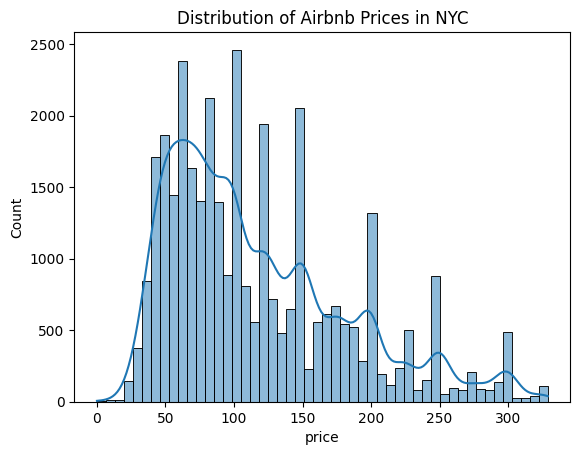

In [50]:
# visualize with seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# histogram for prices in nyc
sns.histplot(myData["price"], bins=50, kde=True)
plt.title("Distribution of Airbnb Prices in NYC")
plt.show()

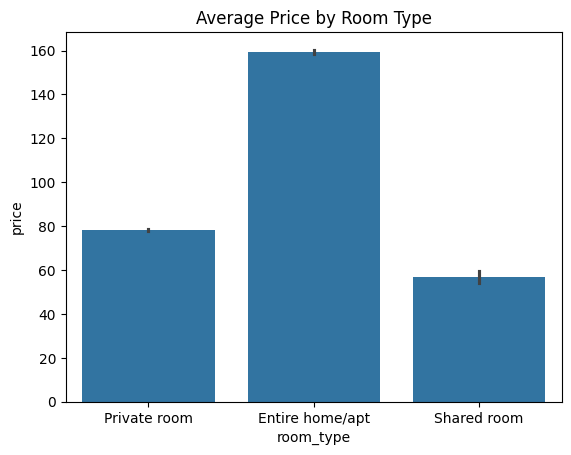

In [51]:
# barplot for price by roomtype

sns.barplot(x="room_type", y="price", data=myData)
plt.title("Average Price by Room Type")
plt.show()

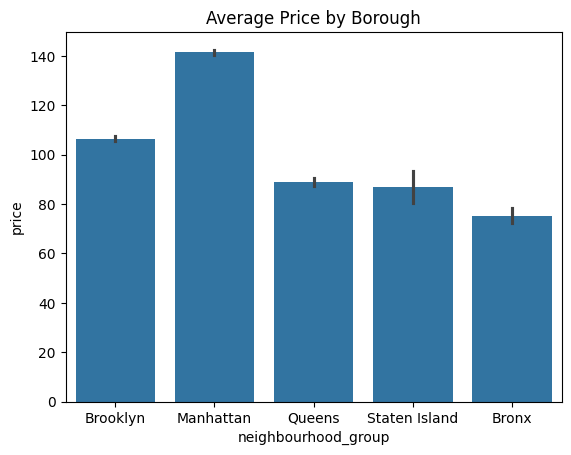

In [52]:
# Average price by borough

sns.barplot(x="neighbourhood_group", y="price", data=myData)
plt.title("Average Price by Borough")
plt.show()

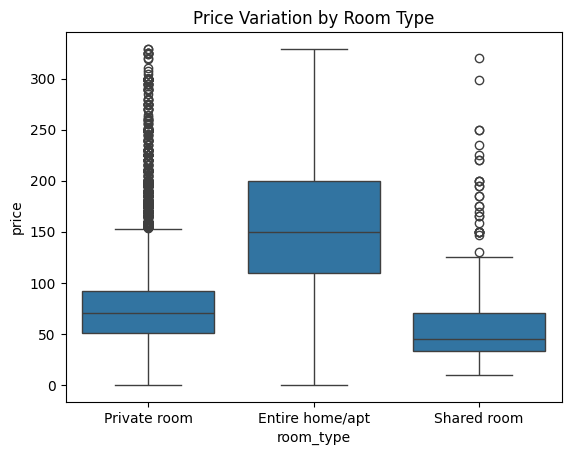

In [53]:
# Price by Room Type
sns.boxplot(x="room_type", y="price", data=myData)
plt.title("Price Variation by Room Type")
plt.show()

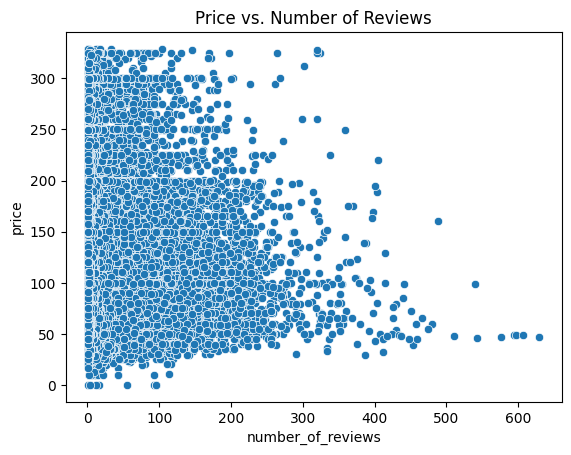

In [54]:
sns.scatterplot(x="number_of_reviews", y="price", data=myData)
plt.title("Price vs. Number of Reviews")
plt.show()

Text(0.5, 1.0, 'Price vs. Minimum Number of Nights')

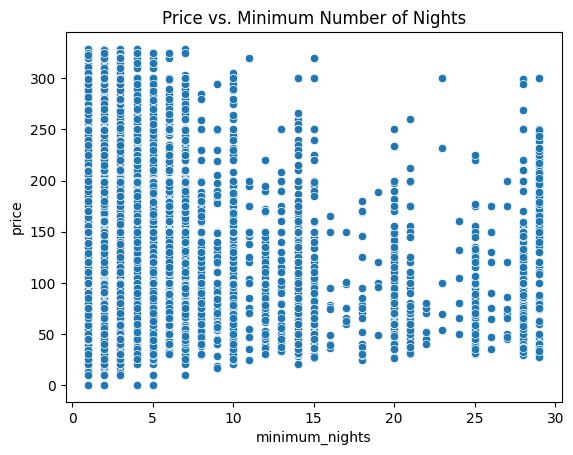

In [56]:
sns.scatterplot(x="minimum_nights", y="price", data=myData)
plt.title("Price vs. Minimum Number )

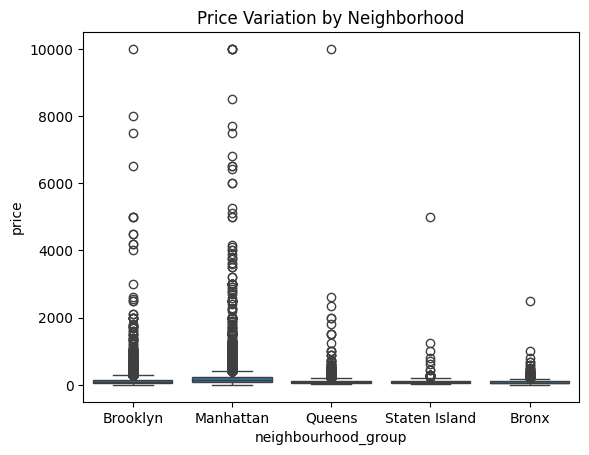

In [57]:
sns.boxplot(x="neighbourhood_group", y="price", data=df)
plt.title("Price Variation by Neighborhood")
plt.show()
